# 6. Take an image and apply Discrete Cosine transformation on it. Display original, Transformed and inverse transformed image.


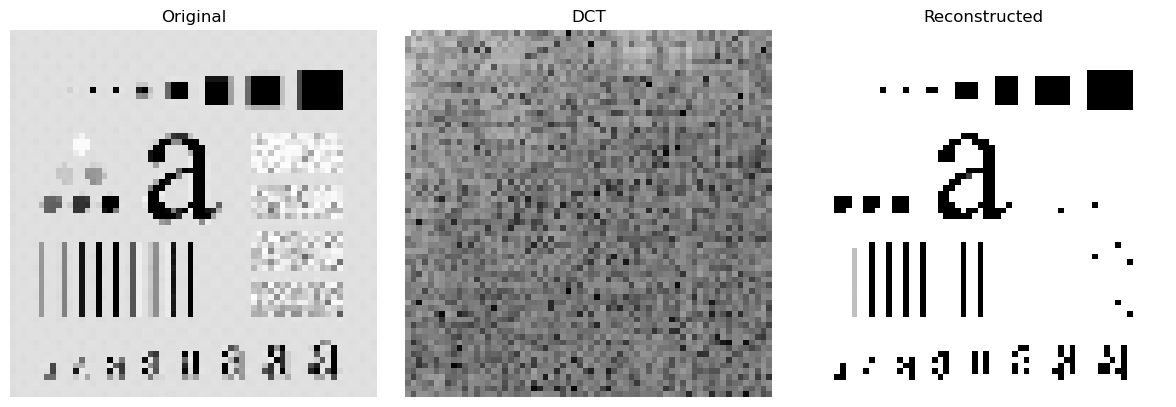

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at {path}")
    return cv2.resize(img, (64, 64)) 
    
def dct_2d(img):
    M, N = img.shape
    dct = np.zeros((M, N))
    img = img.astype(np.float32) - 128  

    for u in range(M):
        for v in range(N):
            sum_ = 0.0
            for x in range(M):
                for y in range(N):
                    sum_ += img[x, y] * \
                            np.cos(((2*x + 1) * u * np.pi) / (2*M)) * \
                            np.cos(((2*y + 1) * v * np.pi) / (2*N))
            cu = 1/np.sqrt(2) if u == 0 else 1
            cv = 1/np.sqrt(2) if v == 0 else 1
            dct[u, v] = 0.25 * cu * cv * sum_
    return dct

def idct_2d(dct):
    M, N = dct.shape
    img = np.zeros((M, N))
    for x in range(M):
        for y in range(N):
            sum_ = 0.0
            for u in range(M):
                for v in range(N):
                    cu = 1/np.sqrt(2) if u == 0 else 1
                    cv = 1/np.sqrt(2) if v == 0 else 1
                    sum_ += cu * cv * dct[u, v] * \
                            np.cos(((2*x + 1) * u * np.pi) / (2*M)) * \
                            np.cos(((2*y + 1) * v * np.pi) / (2*N))
            img[x, y] = 0.25 * sum_
    return np.clip(img + 128, 0, 255).astype(np.uint8)

def plot_images(original, dct_img, reconstructed):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(np.log(abs(dct_img) + 1), cmap='gray')  
    plt.title("DCT")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(reconstructed, cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    img = read_img("../test_imgs/test_img.png")
    dct_img = dct_2d(img)
    reconstructed = idct_2d(dct_img)
    plot_images(img, dct_img, reconstructed)

if __name__ == "__main__":
    main()
